In [1]:
]activate .; instantiate

  Activating project at `C:\Users\Johannes\.julia\dev\FastRunningMedian\benchmark`
┌ Warning: The active manifest file is missing a julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing C:\Users\Johannes\.julia\dev\FastRunningMedian\benchmark\Manifest.toml:0


In [16]:
]status

      Status `C:\Users\Johannes\.julia\dev\FastRunningMedian\benchmark\Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.1
  [3a47ddbd] FastRunningMedian v0.1.0 `..`
  [d330b81b] PyPlot v2.10.0
  [6f49c342] RCall v0.13.13
  [b0e4dd01] RollingFunctions v0.6.2
  [d6dedbf8] SortFilters v0.1.0


In [17]:
using SortFilters, FastRunningMedian, BenchmarkTools, PyPlot, RollingFunctions, RCall

┌ Info: Precompiling FastRunningMedian [3a47ddbd-112b-4cc1-b00e-3746ec434ee5]
└ @ Base loading.jl:1423


In [18]:
# window sizes
W = [5, 15, 51, 151, 515, 1515]
# input length
N = 1_000_000

x = rand(N)

1000000-element Vector{Float64}:
 0.7981752659671155
 0.30842794582151356
 0.4725763629615136
 0.4570785167363297
 0.7031516489799464
 0.43304075600914116
 0.20807299064986262
 0.7836577238148436
 0.1888928386983023
 0.09982183083467633
 0.9002095575350683
 0.43853912593470756
 0.3139908752779933
 ⋮
 0.22452559505792247
 0.07955078925665593
 0.4925595159227467
 0.0043374460450780195
 0.02979754165954318
 0.5751035245121975
 0.2923483388887296
 0.2212814155490448
 0.2722482907817686
 0.19925892532213263
 0.40530346132645834
 0.6960997424018762

WARNING: Takes long time

In [19]:
# arrays for Benchmark results
FRM_results = [] # FastRunningMedian
SF_results = [] # SortingFilters
RF_results = [] # RollingFilters
R_results = [] # R via RCall
xr = robject(x)
RR_mean = [] # R raw (natively benchmarked via R-package microbenchmark)
RR_min = []
RR_max = []
R"library(microbenchmark)"
R"x <- $x";

for w in W
    trial_FRM = @benchmark running_median($x, $w)
    push!(FRM_results, trial_FRM)
    
    trial_SF = @benchmark movsort($x, $w, $.5)
    push!(SF_results, trial_SF)
    
    trial_RF = @benchmark runmedian($x, $w)
    push!(RF_results, trial_RF)
    
    wr = robject(w)
    trial_R = @benchmark rcopy(rcall(:runmed, $x, $w))
    push!(R_results, trial_R)
    
    R"w <- $w"
    R"result <- summary(microbenchmark(runmed(x, w)))"
    push!(RR_mean, rcopy(R"result['mean']")[!, 1][1])
    push!(RR_min, rcopy(R"result['min']")[!, 1][1])
    push!(RR_max, rcopy(R"result['max']")[!, 1][1])
end

In [48]:
FRM_mean =  [(FRM_results[i]|>mean).time/1e9 for i in eachindex(FRM_results)]

6-element Vector{Float64}:
 0.058290426744186045
 0.0679690054054054
 0.07567505970149253
 0.08172852741935484
 0.0875854775862069
 0.09493753018867924

In [49]:
FRM_min =  [(FRM_results[i]|>minimum).time/1e9 for i in eachindex(FRM_results)]

6-element Vector{Float64}:
 0.0553909
 0.0635639
 0.070865
 0.0774933
 0.0838128
 0.0916491

In [50]:
FRM_max =  [(FRM_results[i]|>maximum).time/1e9 for i in eachindex(FRM_results)]

6-element Vector{Float64}:
 0.0692173
 0.0752836
 0.0814233
 0.0933196
 0.0990588
 0.1047387

In [51]:
SF_mean =  [(SF_results[i]|>mean).time/1e9 for i in eachindex(SF_results)]

6-element Vector{Float64}:
 0.037964948484848486
 0.06681720266666666
 0.14793962941176472
 0.3335656733333333
 0.9916374333333333
 2.7946706

In [52]:
SF_min =  [(SF_results[i]|>minimum).time/1e9 for i in eachindex(SF_results)]

6-element Vector{Float64}:
 0.0365428
 0.065239
 0.1456008
 0.3300607
 0.9851609
 2.779557

In [53]:
SF_max =  [(SF_results[i]|>maximum).time/1e9 for i in eachindex(SF_results)]

6-element Vector{Float64}:
 0.0481965
 0.0731158
 0.1541505
 0.3375812
 0.9954487
 2.8097842

In [54]:
RF_mean =  [(RF_results[i]|>mean).time/1e9 for i in eachindex(RF_results)]

6-element Vector{Float64}:
  0.11129114
  0.3219483875
  0.8705225666666666
  2.0557349333333335
  6.3206581
 17.8515052

In [55]:
RF_min =  [(RF_results[i]|>minimum).time/1e9 for i in eachindex(RF_results)]

6-element Vector{Float64}:
  0.1077988
  0.2949699
  0.7828477
  1.9999216
  6.3206581
 17.8515052

In [56]:
RF_max =  [(RF_results[i]|>maximum).time/1e9 for i in eachindex(RF_results)]

6-element Vector{Float64}:
  0.124632
  0.5146565
  1.1411457
  2.1194855
  6.3206581
 17.8515052

In [57]:
R_mean =  [(R_results[i]|>mean).time/1e9 for i in eachindex(R_results)]

6-element Vector{Float64}:
 0.06115473414634146
 0.08908162280701755
 0.10442746875
 0.11794687674418604
 0.14016058888888888
 0.2132602875

In [58]:
R_min =  [(R_results[i]|>minimum).time/1e9 for i in eachindex(R_results)]

6-element Vector{Float64}:
 0.0529117
 0.0798708
 0.0952908
 0.1074247
 0.1309679
 0.1977072

In [59]:
R_max =  [(R_results[i]|>maximum).time/1e9 for i in eachindex(R_results)]

6-element Vector{Float64}:
 0.0892732
 0.1205181
 0.1236807
 0.1449151
 0.1619389
 0.2367408

In [60]:
RR_mean

6-element Vector{Any}:
 0.016540311
 0.043431728999999995
 0.059794005
 0.071615228
 0.10032491400000002
 0.16824344300000002

In [41]:
# convert units
RR_mean .*= 1e-3
RR_min .*= 1e-3
RR_max .*= 1e-3

6-element Vector{Any}:
 0.0376627
 0.0589787
 0.08756359999999999
 0.0817115
 0.1198111
 0.19694640000000002

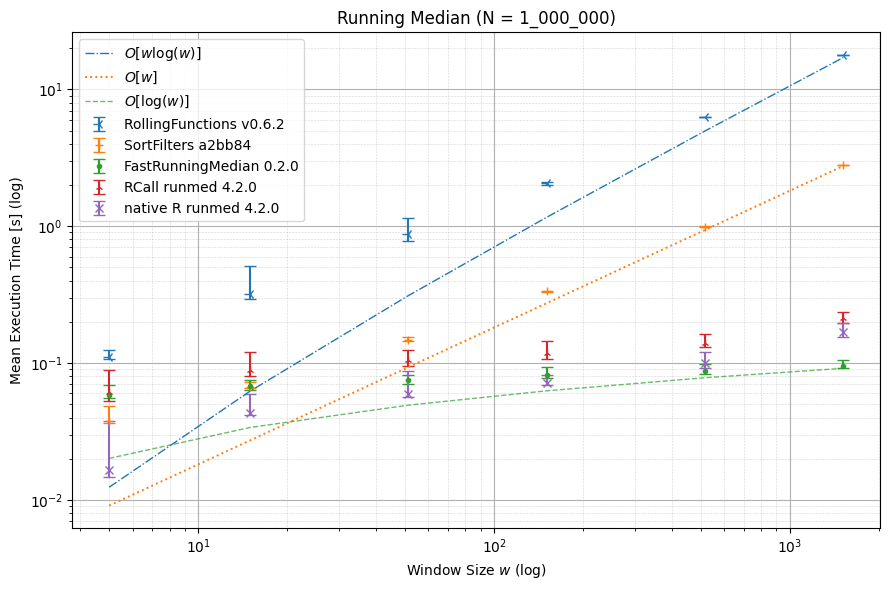

In [80]:
figure(figsize=[9, 6])
errorbar(W, RF_mean, [RF_mean .- RF_min RF_max .- RF_mean]|>transpose, fmt="3", capsize=4, markersize=8, label="RollingFunctions v0.6.2")
errorbar(W, SF_mean, [SF_mean .- SF_min SF_max .- SF_mean]|>transpose, fmt="+", capsize=4, markersize=6, label="SortFilters a2bb84")
errorbar(W, FRM_mean, [FRM_mean .- FRM_min FRM_max .- FRM_mean]|>transpose, fmt=".", capsize=4, label="FastRunningMedian 0.2.0")
errorbar(W, R_mean, [R_mean .- R_min R_max .- R_mean]|>transpose, fmt="2", capsize=4, label="RCall runmed 4.2.0")
errorbar(W, RR_mean, [RR_mean .- RR_min RR_max .- RR_mean]|>transpose, fmt="x", capsize=4, label="native R runmed 4.2.0")
gca()[:set_prop_cycle](nothing)
plot(W, (log.(W).*W)./650, "-.", linewidth=1, label=L"O[w \log (w)]")
plot(W, W./550, ":", linewidth=1.4, label=L"O[w]")
#plot(W, W./80, ":", linewidth=1.4, label=L"O[w]")
plot(W, log.(W)./80, "--", alpha=.7, linewidth=1, label=L"O[\log (w)]")
loglog()
plt.minorticks_on()
grid(which="major")
grid(which="minor", linestyle=":", linewidth=.4)
ylabel("Mean Execution Time [s] (log)")
xlabel(L"Window Size $w$ (log)")
title("Running Median (N = 1_000_000)")
legend()
tight_layout()
savefig("../docs/resources/Running Median Benchmarks.png")